In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
accidents = pd.read_csv('../data/accidents.csv')
casualties = pd.read_csv('../data/casualties.csv', on_bad_lines = 'skip')
vehicles = pd.read_csv('../data/vehicles.csv', on_bad_lines = 'skip')

In [3]:
total_accidents_vehicle = accidents.merge(vehicles, how='left', on='Accident_Index')
total_accidents_vehicle_casualties = total_accidents_vehicle.merge(casualties, how='left', on=['Accident_Index', 'Vehicle_Reference'])
fatal_accidents = total_accidents_vehicle_casualties[total_accidents_vehicle_casualties['Casualty_Severity'] == 1]

In [4]:
fatal_summary = pd.DataFrame(fatal_accidents.groupby('Vehicle_Type').size()).reset_index(drop = False)
fatal_summary = fatal_summary[fatal_summary['Vehicle_Type'] > 0]
fatal_summary = fatal_summary[fatal_summary['Vehicle_Type'] < 19]

In [5]:
vehicle_names = pd.read_csv('../data/context/Vehicle_Type.csv')

In [6]:
fatal_summary = fatal_summary.merge(vehicle_names, how = 'left', left_on = 'Vehicle_Type', right_on = 'code'). \
                drop(columns = ['code', 'Vehicle_Type'])
fatal_summary.columns = ['count', 'vehicle']

In [7]:
fatal_summary

,count,vehicle
0,1237,Pedal cycle
1,145,Motorcycle 50cc and under
2,602,Motorcycle 125cc and under
3,481,Motorcycle over 125cc and up to 500cc
4,3425,Motorcycle over 500cc
5,281,Taxi/Private hire car
6,14331,Car
7,75,Minibus (8 - 16 passenger seats)
8,473,Bus or coach (17 or more pass seats)
9,21,Ridden horse


In [8]:
summary = pd.DataFrame(total_accidents_vehicle.groupby('Vehicle_Type').size()).reset_index(drop = False)
summary = summary[summary['Vehicle_Type'] > 0]
summary = summary[summary['Vehicle_Type'] < 19]
summary = summary.merge(vehicle_names, how = 'left', left_on = 'Vehicle_Type', right_on = 'code')
summary = summary.drop(columns = ['Vehicle_Type', 'code'])
summary.columns = ['count', 'vehicle']
summary

,count,vehicle
0,184083,Pedal cycle
1,37224,Motorcycle 50cc and under
2,70152,Motorcycle 125cc and under
3,25686,Motorcycle over 125cc and up to 500cc
4,86904,Motorcycle over 500cc
5,52409,Taxi/Private hire car
6,2205201,Car
7,8387,Minibus (8 - 16 passenger seats)
8,76888,Bus or coach (17 or more pass seats)
9,1297,Ridden horse


In [9]:
def transform_label(label):
    if 'Motorcycle' in label:
        return 'Motorcycle'
    elif 'car' in label or 'Car' in label:
        return 'Car'
    elif 'bus' in label or 'Bus' in label:
        return 'Bus'
    elif 'horse' in label:
        return 'Horse'
    return label

In [10]:
fatals_with_summary = fatal_summary.merge(summary, how = 'left', on ='vehicle')
fatals_with_summary = fatals_with_summary.assign(
    vehicle = list(map(transform_label, fatals_with_summary.vehicle))
)
fatals_with_summary = fatals_with_summary.groupby('vehicle').sum(['count_x', 'count_y']).reset_index(drop=False)
fatals_with_summary = fatals_with_summary.assign(
    ratio = fatals_with_summary['count_x']/fatals_with_summary['count_y']
)
fatals_with_summary = fatals_with_summary.sort_values('ratio', ascending=False)
fatals_with_summary

,vehicle,count_x,count_y,ratio
6,Tram,7,250,0.028000
4,Motorcycle,4653,219966,0.021153
3,Horse,21,1297,0.016191
5,Pedal cycle,1237,184083,0.006720
2,Car,14612,2257610,0.006472
1,Bus,548,85275,0.006426
0,Agricultural vehicle,37,6304,0.005869


C:\Users\user\AppData\Local\Temp/ipykernel_11812/3310615623.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.2}%'.format(x) for x in ax.get_yticks()])


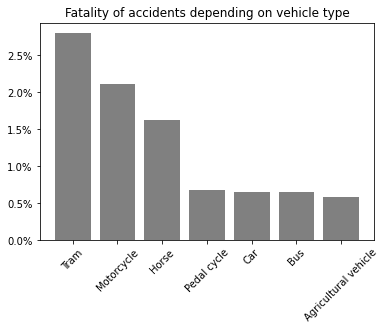

In [11]:
plot = plt.bar(x=fatals_with_summary['vehicle'], height=fatals_with_summary['ratio']*100, color='grey')
ax = plot[0].axes
ax.set_yticklabels(['{:,.2}%'.format(x) for x in ax.get_yticks()])
plt.xticks(rotation=45)
plt.title('Fatality of accidents depending on vehicle type')
plt.savefig('../plots/fatals_by_vehicle_type.jpeg')

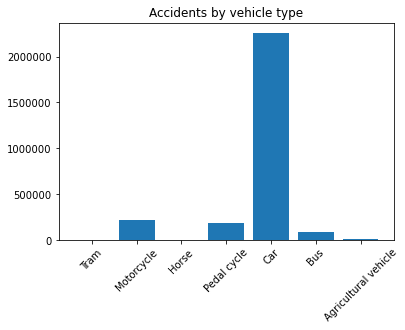

In [12]:
plot = plt.bar(x=fatals_with_summary['vehicle'], height=fatals_with_summary['count_y'])
ax = plot[0].axes
ax.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.title('Accidents by vehicle type')
plt.savefig('../plots/accidents_by_vehicle_type.jpeg')